<!--BOOK_INFORMATION-->
<img style="float: right; width: 100px" src="https://raw.github.com/pyomeca/design/master/logo/logo_cropped.svg?sanitize=true">

# Pyosim in the cloud
## with [pyomeca](https://github.com/pyomeca/pyomeca)
Romain Martinez (martinez.staps@gmail.com | [GitHub](https://github.com/romainmartinez))


<!--NAVIGATION-->
| [Contents](Index.ipynb) | [Verification](01.00-verification.ipynb) >

# Logistics

## Things to do

- add EWMA by shift
- get canadiens by shift data
- merge data [WORKING ON]
- get coordiantes from every goal

In [1]:
from pathlib import Path

import pandas as pd

import altair as alt

## Time sheet

In [2]:
RAW_DATA_PATH = Path("../data/raw/")
TIME_SHEET_FILE = "canadiens_time_sheet - this year.csv"

In [3]:
time_sheet = pd.read_csv(
    RAW_DATA_PATH / TIME_SHEET_FILE, header=9, usecols=[0, 1, 4], skiprows=1
)[:-1]
time_sheet.columns = ["date", "description", "hours"]
time_sheet["hours_done"] = time_sheet["hours"].apply(lambda x: float(x.replace(",", ".")))
time_sheet["date"] = pd.to_datetime(time_sheet["date"])

time_sheet = time_sheet.resample("1d", on="date").sum().reset_index()

In [4]:
total_hours = 500
start = time_sheet['date'].min()
end = pd.to_datetime("2019-03-01")

time_sheet["hours_to_do"] = total_hours / ((end - start).days + 1)

In [5]:
time_sheet.head()

,date,hours_done,hours_to_do
0,2018-09-10,6.5,2.890173
1,2018-09-11,0.0,2.890173
2,2018-09-12,10.0,2.890173
3,2018-09-13,0.0,2.890173
4,2018-09-14,8.0,2.890173


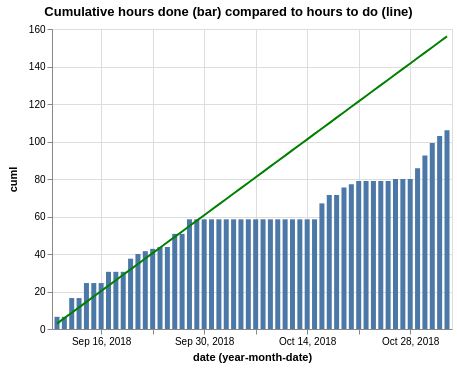

In [6]:
base = alt.Chart(time_sheet).encode(x="yearmonthdate(date)")

done = (
    base.mark_bar()
    .encode(y="cuml:Q")
    .transform_window(cuml="sum(hours_done)", frame=[None, 0])
)
to_do = (
    base.mark_line(color="green")
    .encode(y="cuml:Q")
    .transform_window(cuml="sum(hours_to_do)", frame=[None, 0])
)

(done + to_do).properties(title="Cumulative hours done (bar) compared to hours to do (line)")

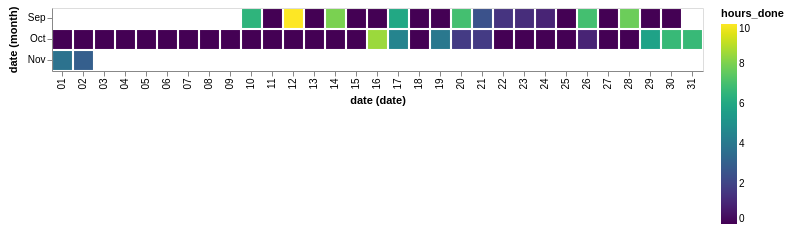

In [7]:
alt.Chart(time_sheet).mark_rect().encode(
    x="date(date):O", y="month(date):O", color="hours_done"
)

<!--NAVIGATION-->
| [Contents](Index.ipynb) | [Verification](01.00-verification.ipynb) >